In [1]:
"""Investigating undersampling coupled with different classifiers"""

'Investigating undersampling coupled with different classifiers'

In [2]:
"""Preparation"""

'Preparation'

In [3]:
# Importing libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

import collections

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
# Importing the data
df = pd.read_csv('../input/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

# Note: it appears that the means of Time and Amount are too big compared to those of the other features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking how imbalanced the dataset is
collections.Counter(df['Class'])

Counter({0: 284315, 1: 492})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

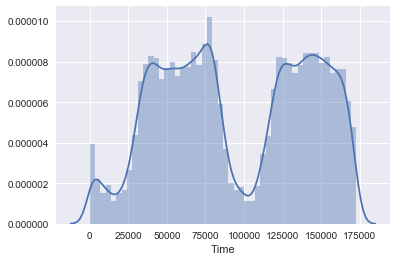

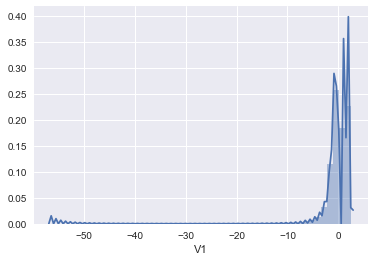

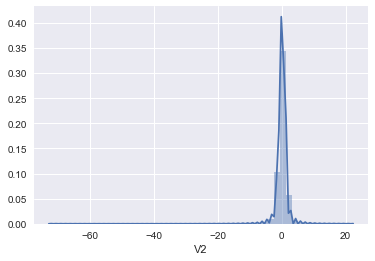

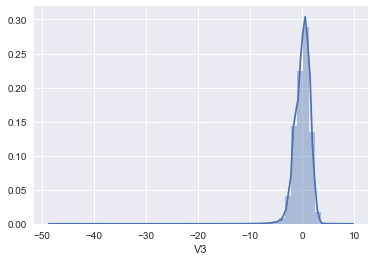

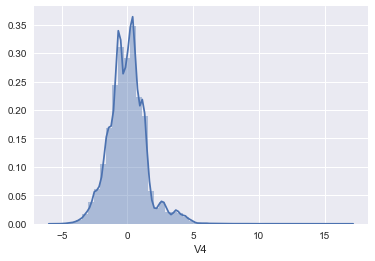

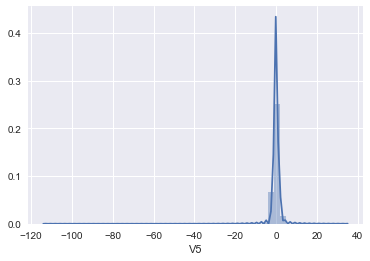

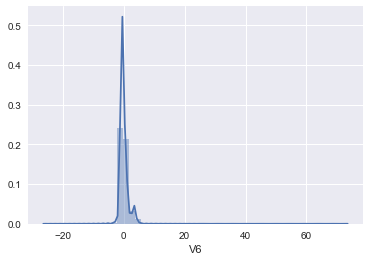

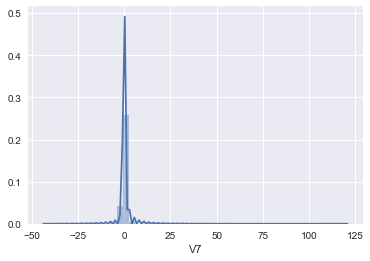

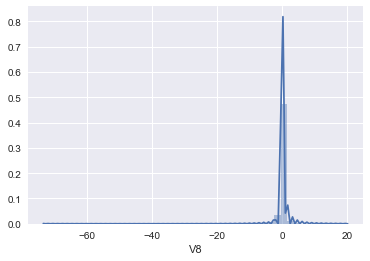

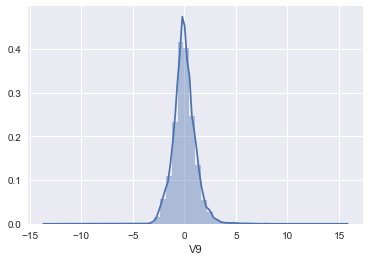

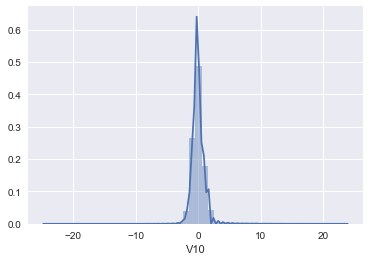

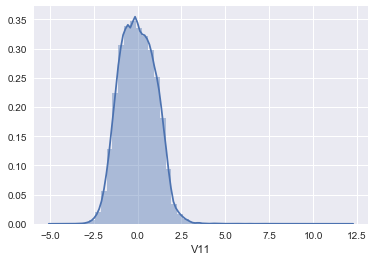

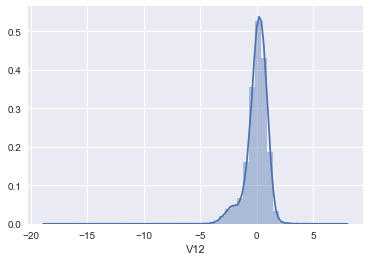

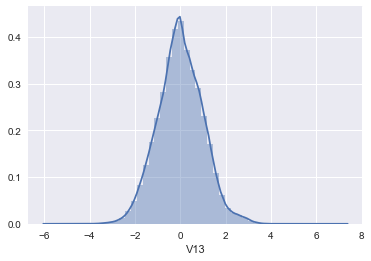

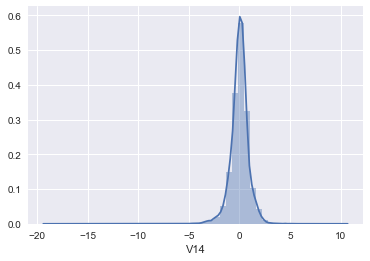

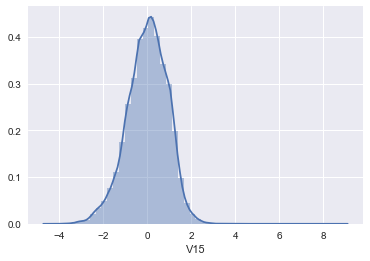

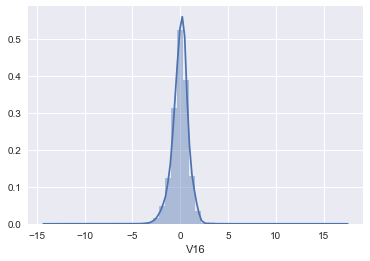

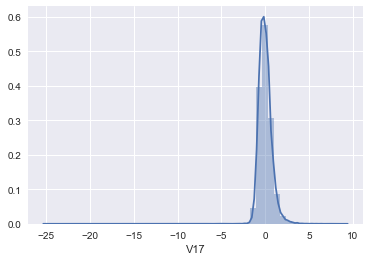

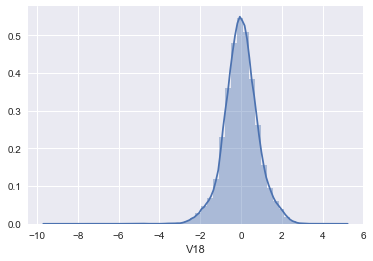

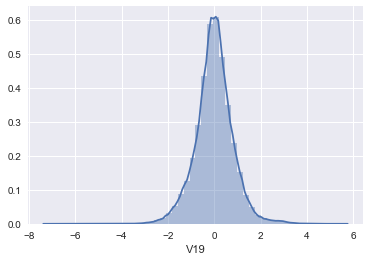

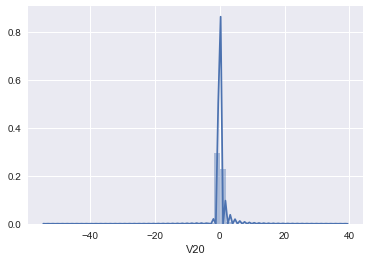

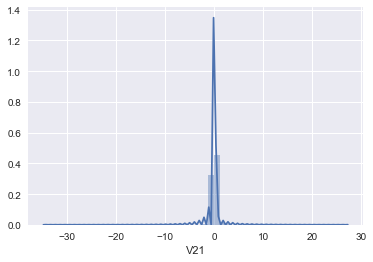

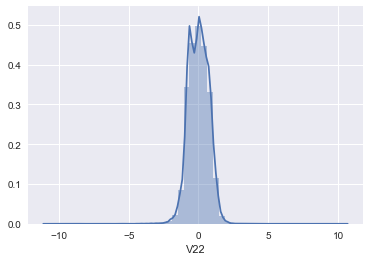

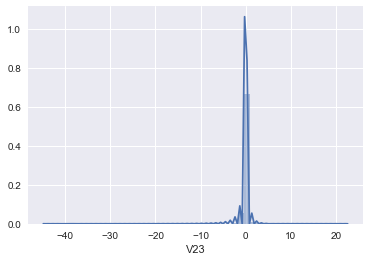

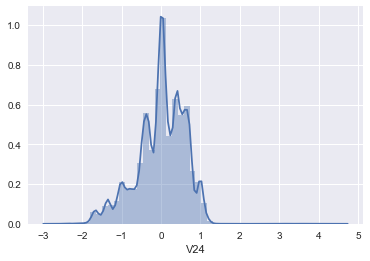

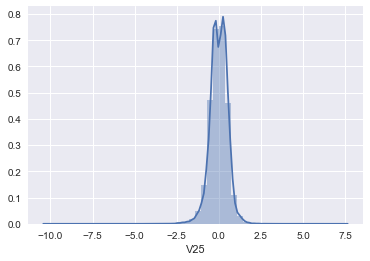

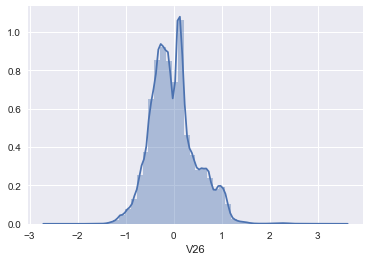

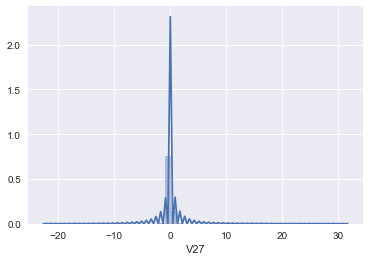

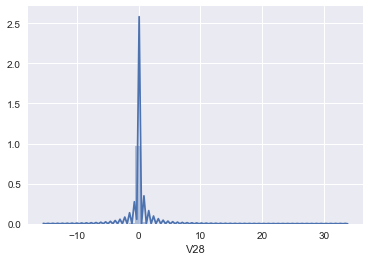

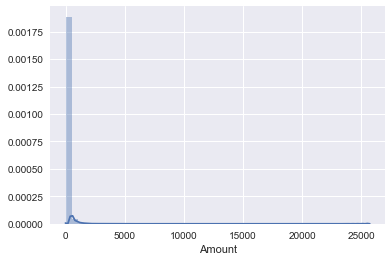

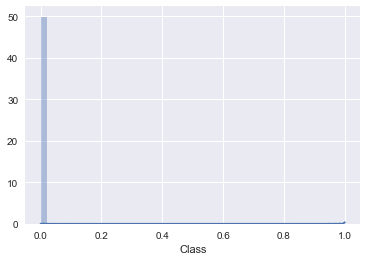

In [8]:
# Looking at distributions to see whether the variables are scaled
sns.set(color_codes=True)
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [9]:
plt.close('all')

In [10]:
# Judging from the distributions and means, only the time and amount features need to be scaled
scaler = RobustScaler()

df.insert(0, 'Time_Scaled', scaler.fit_transform(df['Time'].values.reshape(-1,1)))
df.insert(0, 'Amount_Scaled', scaler.fit_transform(df['Amount'].values.reshape(-1,1)))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
df.describe()

,Amount_Scaled,Time_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [12]:
# Splitting the data into training and testing datasets

# Shuffling the data (just in case)
df.sample(frac=1)

X = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
"""Undersampling"""

'Undersampling'

In [14]:
# Undersampling the development data
sampler = RandomUnderSampler()
x_train_under, y_train_under = sampler.fit_sample(x_train, y_train)

In [15]:
# Checking the number of classes now 
collections.Counter(y_train_under)

Counter({0: 404, 1: 404})

In [16]:
"""Testing undersampling on different classifiers"""

'Testing undersampling on different classifiers'

In [17]:
# Making the classifiers
perceptron = Perceptron()
logit = LogisticRegression()
svc = SVC()

In [18]:
# Evaluating the perceptron
perceptron.fit(x_train_under, y_train_under)
perceptron.score(x_test, y_test)

0.7945472420209965

In [19]:
y_predict_perceptron = perceptron.predict(x_test)
precision_recall_fscore_support(y_test, y_predict_perceptron)

(array([0.99988933, 0.00704524]),
 array([0.79431726, 0.94318182]),
 array([0.88532654, 0.01398601]),
 array([56874,    88]))

In [20]:
classification_report(y_test, y_predict_perceptron)

'              precision    recall  f1-score   support\n\n           0       1.00      0.79      0.89     56874\n           1       0.01      0.94      0.01        88\n\n    accuracy                           0.79     56962\n   macro avg       0.50      0.87      0.45     56962\nweighted avg       1.00      0.79      0.88     56962\n'

In [21]:
# Evaluating logistic regression
logit.fit(x_train_under, y_train_under)
logit.score(x_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9645202064534251

In [22]:
y_predict_logit = perceptron.predict(x_test)
precision_recall_fscore_support(y_test, y_predict_logit)

(array([0.99988933, 0.00704524]),
 array([0.79431726, 0.94318182]),
 array([0.88532654, 0.01398601]),
 array([56874,    88]))

In [23]:
classification_report(y_test, y_predict_logit)

'              precision    recall  f1-score   support\n\n           0       1.00      0.79      0.89     56874\n           1       0.01      0.94      0.01        88\n\n    accuracy                           0.79     56962\n   macro avg       0.50      0.87      0.45     56962\nweighted avg       1.00      0.79      0.88     56962\n'

In [24]:
# Evaluating SVM
svc.fit(x_train_under, y_train_under)
svc.score(x_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9406797514132228

In [25]:
y_predict_svc = perceptron.predict(x_test)
precision_recall_fscore_support(y_test, y_predict_svc)

(array([0.99988933, 0.00704524]),
 array([0.79431726, 0.94318182]),
 array([0.88532654, 0.01398601]),
 array([56874,    88]))

In [26]:
classification_report(y_test, y_predict_svc)

'              precision    recall  f1-score   support\n\n           0       1.00      0.79      0.89     56874\n           1       0.01      0.94      0.01        88\n\n    accuracy                           0.79     56962\n   macro avg       0.50      0.87      0.45     56962\nweighted avg       1.00      0.79      0.88     56962\n'